## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 데이터 불러오기

특징값 데이터 불러와서 정상/고장 분리

In [2]:
FeatureData = pd.read_csv('./ProcessedData/FeatureData', sep=',', header=None)
FeatureData.shape

(270, 360)

P value 순위 데이터 불러오기

In [3]:
P_value_Rank = pd.read_csv('./ProcessedData/P_value_Rank' , sep=',' , header=None)
P_value_Rank

,0,1
0,144.0,6.258777e-141
1,143.0,5.632614e-138
2,124.0,2.431809e-91
3,123.0,5.171276e-91
4,134.0,9.831666e-90
...,...,...
265,228.0,9.695842e-01
266,209.0,9.775134e-01
267,245.0,9.838356e-01
268,59.0,9.898458e-01


## P value 기준 Feature 선정

In [4]:
# StartRank 부터 Number 만큼의 Feature
StartRank = 1
Number = 30

SelectedFeatues = np.zeros((Number,FeatureData.shape[1]))

s = 0

for i in range(StartRank, StartRank+Number):
    
    index                 = int(P_value_Rank.iloc[i-1,0])
    SelectedFeatues[s,:]   = FeatureData.iloc[index,:].values
    s += 1

# 정상, 고장 특징값 합치기    
FeatureSelected = pd.DataFrame(SelectedFeatues)
FeatureSelected.shape

(30, 360)

In [5]:
FeatureSelected = np.transpose(FeatureSelected)
FeatureSelected.shape

(360, 30)

## 데이터 정규화

In [6]:
# 선정된 특징데이터에 대한 정규화
FeatureSelected_std = StandardScaler().fit_transform(FeatureSelected)
FeatureSelected_std.shape

(360, 30)

## 선정된 Feature PCA

In [7]:
# 10개 PC(Principal Component) 추출
pca = PCA(n_components = 10)
PC = pca.fit_transform(FeatureSelected_std)

# 설명된 분산의 비율
VarRatio = pca.explained_variance_ratio_
VarRatio = pd.DataFrame(np.round_(VarRatio,3))

# 설명된 분산의 비율 누적
CumVarRatio = np.cumsum(pca.explained_variance_ratio_)
CumVarRatio_df = pd.DataFrame(np.round_(CumVarRatio,3))

Result = pd.concat([VarRatio , CumVarRatio_df], axis=1)
Result


,0,0
0,0.549,0.549
1,0.112,0.661
2,0.064,0.725
3,0.054,0.779
4,0.051,0.830
5,0.035,0.864
6,0.033,0.897
7,0.021,0.918
8,0.013,0.931
9,0.012,0.943


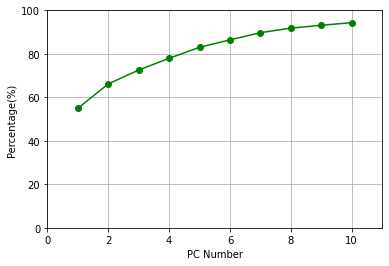

In [8]:
# 누적값 그래프로 시각화
plt.plot(range(1,11), CumVarRatio*100, color='green', linestyle='-', marker='o')
plt.ylim(0,100)
plt.xlim(0,11)
plt.grid()
plt.xlabel('PC Number')
plt.ylabel('Percentage(%)')
plt.show()

## Selected Feature PCA (2차원) 기반 분포 시각화

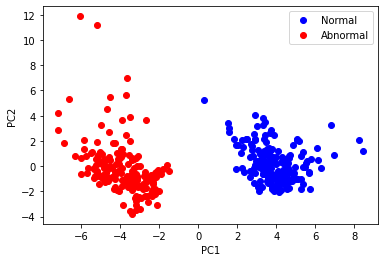

In [9]:
NoOfData = int(FeatureData.shape[1]/2)

plt.plot(PC[:NoOfData,0], PC[:NoOfData,1], color='b', linestyle='', marker='o', label='Normal')
plt.plot(PC[NoOfData:,0], PC[NoOfData:,1], color='r', linestyle='', marker='o', label='Abnormal')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()